# QPU Latency Results

Code and datasets for producing **Figure 5** from _A quantum-classical cloud platform optimized for variational hybrid algorithms_.

The `forest-web-api.csv` file contains runtime data from programs run via the **Forest Web API**, the previous iteration of Rigetti's quantum cloud service. The data spans the top ten numbers of shots (1, 10, 50, 100, 500, 1000, 2000, 5000, 8000, 10,000) run on that version of the platform. Additionally, the Forest Web API programs used an average of 3 qubits.

The `qcs-standard-compilation.csv` file contains runtime data collected for a wide range of shots (1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000) via the **Quantum Cloud Services** (QCS) platform, using the _random phase gadgets_ benchmark on Aspen-4 QPU (which has log quantum volume of 3). The `qcs-parametric-compilation.csv` file contains the same sort of runtime data, but with _parametric compilation_ enabled. Finally, the `qcs-active-qubit-reset.csv` file contains the same sort of runtime data, but with _parametric compilation_ and _active qubit reset_ enabled.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lmfit.models import LinearModel
sns.set_style("ticks")

## Load the Data

In [2]:
df_forest_web_api = pd.read_csv("datasets/forest-web-api.csv")
df_qcs_standard_compilation = pd.read_csv("datasets/qcs-standard-compilation.csv")
df_qcs_parametric_compilation = pd.read_csv("datasets/qcs-parametric-compilation.csv")
df_qcs_active_qubit_reset = pd.read_csv("datasets/qcs-active-qubit-reset.csv")

In [3]:
def get_medians_dict(df: pd.DataFrame) -> dict:
    medians_dict = {}
    for shots in df.shots.unique():
        medians_dict[shots] = np.median(df[df.shots == shots].time)
    return medians_dict

In [4]:
medians_forest_web_api = get_medians_dict(df_forest_web_api)
medians_qcs_standard_compilation = get_medians_dict(df_qcs_standard_compilation)
medians_qcs_parametric_compilation = get_medians_dict(df_qcs_parametric_compilation)
medians_qcs_active_qubit_reset = get_medians_dict(df_qcs_active_qubit_reset)

In [5]:
x_forest_web_api = list(medians_forest_web_api.keys())
x_qcs_standard_compilation = list(medians_qcs_standard_compilation.keys())
x_qcs_parametric_compilation = list(medians_qcs_parametric_compilation.keys())
x_qcs_active_qubit_reset = list(medians_qcs_active_qubit_reset.keys())

y_forest_web_api = list(medians_forest_web_api.values())
y_qcs_standard_compilation = list(medians_qcs_standard_compilation.values())
y_qcs_parametric_compilation = list(medians_qcs_parametric_compilation.values())
y_qcs_active_qubit_reset = list(medians_qcs_active_qubit_reset.values())

## Fit the Data

In [6]:
linear_model = LinearModel()

### Extract $T_Q$ from slope

In [7]:
fit_result_forest_web_api = linear_model.fit(data=y_forest_web_api, x=x_forest_web_api)
tQ_forest_web_api = int(round(fit_result_forest_web_api.values["slope"] * 1e6, -1))
print(f"T_Q = {tQ_forest_web_api} μs")

T_Q = 270 μs


In [8]:
fit_result_qcs_standard_compilation = linear_model.fit(data=y_qcs_standard_compilation,
                                                       x=x_qcs_standard_compilation)
tQ_qcs_standard_compilation = int(round(fit_result_qcs_standard_compilation.values["slope"] * 1e6, -1))
print(f"T_Q = {tQ_qcs_standard_compilation} μs")

T_Q = 110 μs


In [9]:
print(x_qcs_parametric_compilation)

[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


In [10]:
fit_result_qcs_parametric_compilation = linear_model.fit(data=y_qcs_parametric_compilation,
                                                         x=x_qcs_parametric_compilation)
tQ_qcs_parametric_compilation = int(round(fit_result_qcs_parametric_compilation.values["slope"] * 1e6, -1))
print(f"T_Q = {tQ_qcs_parametric_compilation} μs")

T_Q = 110 μs


In [11]:
fit_result_qcs_active_qubit_reset = linear_model.fit(data=y_qcs_active_qubit_reset,
                                                     x=x_qcs_active_qubit_reset)
tQ_qcs_active_qubit_reset = int(round(fit_result_qcs_active_qubit_reset.values["slope"] * 1e6))
print(f"T_Q = {tQ_qcs_active_qubit_reset} μs")

T_Q = 21 μs


### Extract $T_V$ from intercept (for shots <= 1000)

In [12]:
fit_result_low_shots_forest_web_api = linear_model.fit(data=y_forest_web_api[:6], x=x_forest_web_api[:6])
tV_forest_web_api = round(fit_result_low_shots_forest_web_api.values["intercept"])
print(f"T_V = {tV_forest_web_api} s")

T_V = 1.0 s


In [13]:
fit_result_low_shots_qcs_standard_compilation = linear_model.fit(data=y_qcs_standard_compilation[:10],
                                                                 x=x_qcs_standard_compilation[:10])
tV_qcs_standard_compilation = int(round(fit_result_low_shots_qcs_standard_compilation.values["intercept"] * 1e3, -1))
print(f"T_V = {tV_qcs_standard_compilation} ms")

T_V = 410 ms


In [14]:
fit_result_low_shots_qcs_parametric_compilation = linear_model.fit(data=y_qcs_parametric_compilation[:10],
                                                                   x=x_qcs_parametric_compilation[:10])
tV_qcs_parametric_compilation = int(round(fit_result_low_shots_qcs_parametric_compilation.values["intercept"] * 1e3))
print(f"T_V = {tV_qcs_parametric_compilation} ms")

T_V = 36 ms


In [15]:
fit_result_low_shots_qcs_active_qubit_reset = linear_model.fit(data=y_qcs_active_qubit_reset[:10],
                                                                   x=x_qcs_active_qubit_reset[:10])
tV_qcs_active_qubit_reset = int(round(fit_result_low_shots_qcs_active_qubit_reset.values["intercept"] * 1e3))
print(f"T_V = {tV_qcs_active_qubit_reset} ms")

T_V = 36 ms


### Extract $n_c$ from $T_V$ to $T_Q$ ratio

In [16]:
nC = int(round((tV_qcs_active_qubit_reset * 1e-3) / (tQ_qcs_active_qubit_reset * 1e-6), -2))
print(f"n_c = {nC} shots")

n_c = 1700 shots


### Extract QCS vs Forest Web API multiplier

In [17]:
tQ_improvement = int(tQ_forest_web_api / tQ_qcs_active_qubit_reset)
print(f"T_Q improves over {tQ_improvement}x from the Forest Web API to QCS")

T_Q improves over 12x from the Forest Web API to QCS


In [18]:
tV_improvement = int(tV_forest_web_api / (tV_qcs_active_qubit_reset * 1e-3))
print(f"T_V improves over {tV_improvement}x from the Forest Web API to QCS")

T_V improves over 27x from the Forest Web API to QCS


## Plot the Data

In [19]:
def add_formatting_ax(ax: plt.Axes, rightmost: bool = False):
    ax.set_ylim(0.01, 25)
    ax.set_xlim(1, 100_000)
    ax.set_xscale("log")
    ax.set_yscale("log")
    if rightmost:
        ax.set_xticks([1,10,100,1000,10000,100_000])
    else:
        ax.set_xticks([1,10,100,1000,10000])
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper left", fontsize=15)
    ax.set_xlabel("shots", size=16)

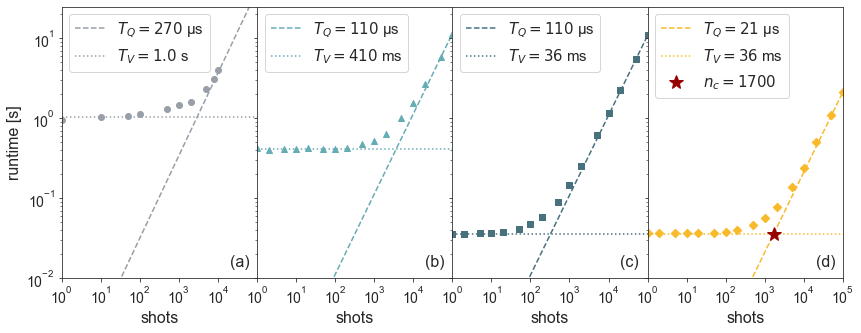

In [20]:
FIG_TEXT_X = 20_000
FIG_TEXT_Y = 0.014
FIG_TEXT_SIZE = 16
SHOTS_MIN = 1
SHOTS_MAX = 100_000

DARK_TEAL = "#47717d"
GOLD = "#f8ba2b"
LIGHT_GRAY = "#989fa8"
LIGHT_TEAL = "#66acb4"

# figure with 1 row of 4 subplots, sharing the y-axis
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(14, 5), sharey=True) 

# set the spacing between subplots to zero
fig.subplots_adjust(wspace=0)

################
# FOREST WEB API
################

# plot median runtime data for the forest web api
ax0.scatter(x_forest_web_api,
            y_forest_web_api,
            marker="o",
            color=LIGHT_GRAY)

# plot slope-1 asymptote for forest web api data
ax0.plot([SHOTS_MIN, SHOTS_MAX],
         [2.7478e-04, 39.673719999999996],
         "--",
         color=LIGHT_GRAY,
         label=rf"$T_Q = {tQ_forest_web_api}$ μs")

# plot horizontal asymptote for forest web api data
ax0.axhline(1.03130023,
            linestyle=":",
            color=LIGHT_GRAY,
            label=rf"$T_V = {tV_forest_web_api}$ s")

# add the (a) label for forest web api data
ax0.text(FIG_TEXT_X, FIG_TEXT_Y, "(a)", fontsize=FIG_TEXT_SIZE)

######################
# STANDARD COMPILATION
######################

# plot median runtime data for QCS + standard compilation
ax1.scatter(x_qcs_standard_compilation,
            y_qcs_standard_compilation,
            marker="^",
            color=LIGHT_TEAL)

# plot slope-1 asymptote for standard compilation data
ax1.plot([SHOTS_MIN, SHOTS_MAX],
         [tQ_qcs_standard_compilation*1e-6, y_qcs_standard_compilation[-1]],
         "--",
         color=LIGHT_TEAL,
         label=rf"$T_Q = {tQ_qcs_standard_compilation}$ μs")

# plot horizontal asymptote for standard compilation data
ax1.axhline(tV_qcs_standard_compilation*1e-3,
            linestyle=":",
            color=LIGHT_TEAL,
            label=rf"$T_V = {tV_qcs_standard_compilation}$ ms")

# add the (b) label for standard compilation data
ax1.text(FIG_TEXT_X, FIG_TEXT_Y, "(b)", fontsize=FIG_TEXT_SIZE)

########################
# PARAMETRIC COMPILATION
########################

# plot median runtime data for QCS + parametric compilation
ax2.scatter(x_qcs_parametric_compilation,
            y_qcs_parametric_compilation,
            marker="s",
            color=DARK_TEAL)

# plot slope-1 asymptote for parametric compilation data
ax2.plot([SHOTS_MIN, SHOTS_MAX],
         [tQ_qcs_parametric_compilation*1e-6, y_qcs_parametric_compilation[-1]],
         "--",
         color=DARK_TEAL,
         label=rf"$T_Q = {tQ_qcs_parametric_compilation}$ μs")

# plot horizontal asymptote for parametric compilation data
ax2.axhline(tV_qcs_parametric_compilation*1e-3,
            linestyle=":",
            color=DARK_TEAL,
            label=rf"$T_V = {tV_qcs_parametric_compilation}$ ms")

# add the (c) label for parametric compilation data
ax2.text(FIG_TEXT_X, FIG_TEXT_Y,"(c)", fontsize=FIG_TEXT_SIZE)

####################
# ACTIVE QUBIT RESET
####################

# plot median runtime data for QCS + active qubit reset
ax3.scatter(x_qcs_active_qubit_reset,
            y_qcs_active_qubit_reset,
            marker="D",
            color=GOLD)

# plot slope-1 asymptote for active qubit reset data
ax3.plot([SHOTS_MIN, SHOTS_MAX],
         [tQ_qcs_active_qubit_reset*1e-6, y_qcs_active_qubit_reset[-1]],
         "--",
         color=GOLD,
         label=rf"$T_Q = {tQ_qcs_active_qubit_reset}$ μs")

# plot horizontal asymptote for active qubit reset data
ax3.axhline(tV_qcs_active_qubit_reset*1e-3,
            linestyle=":",
            color=GOLD,
            label=rf"$T_V = {tV_qcs_active_qubit_reset}$ ms")

# add the (d) label for active qubit reset data
ax3.text(FIG_TEXT_X, FIG_TEXT_Y,"(d)", fontsize=FIG_TEXT_SIZE)

# plot the critical shot number (n_c)
ax3.plot([nC],
         tV_qcs_active_qubit_reset*1e-3,
         marker="*",
         markersize=14,
         color="#980000",
         linestyle="None",
         label=rf"$n_c = {nC}$")

############
# FORMATTING
############

# add formatting to each subplot
add_formatting_ax(ax0)
add_formatting_ax(ax1)
add_formatting_ax(ax2)
add_formatting_ax(ax3, rightmost=True)

# add a y-axis label to subplot 0
ax0.set_ylabel("runtime [s]", size=FIG_TEXT_SIZE);